# Capstone Project: Consumer Insights for Beats by Dre

## **1. General Information**
**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre  
**Student Name:** Charity Okpanachi  
**Date:** October 13th, 2024

## **2. Table of Contents**
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Strategic Recommendations
8. Conclusion
9. References

## **3. Introduction**

### **3.1 Project Overview**

The objective of this project is to conduct an in-depth data analysis of customer reviews and sentiment for **Beats Pill Speaker** to uncover valuable insights that can help Beats by Dre enhance product offerings and customer satisfaction. This project will leverage advanced data analytics techniques and AI-driven sentiment analysis to extract patterns and trends from customer feedback. By analyzing review content, star ratings, and sentiment polarity, this project aims to identify key drivers of customer satisfaction, and potential areas for improvement. The insights generated from this analysis will assist Beats by Dre in making data-driven decisions for product development, marketing strategies, and customer engagement.

**Key Objectives**
- Data collection and preparation.
- Performing Exploratory Data Analysis (EDA) of customer reviews.
- Applying Natural Language Processing (NLP) techniques to perform sentiment analysis on the review texts.
- Utilizing AI to gain deeper insights into customer preferences.
- Compare Beats Pill Speaker reviews with those of competitors.
- Provide actionable insights for decision making.

### **3.2 Background**

**Beats by Dre,** is a prominent audio brand co-founded by the famous music producer Dr. Dre and record executive Jimmy Iovine in 2006. The company primarily focuses on high-quality consumer audio products, including headphones, earphones, and speakers. Beats quickly gained a reputation for its premium, bass-heavy sound quality, sleek designs, and association with celebrity endorsements, making it a cultural phenomenon in the audio market.

In today's fast-paced tech industry, consumer sentiment analysis is crucial for understanding how products are received by users. With the rise of online platforms, consumers now share their opinions, reviews, and experiences more openly than ever before. Sentiment analysis holds immense importance for the following reasons:
- Understanding Customer Preferences
- Product Improvement and Innovation
- Competitive Edge
- Brand Perception and Loyalty
- Predicting Market Trends
- Informed Marketing Strategies

Consumer sentiment analysis provides valuable data-driven insights that can directly impact a company's product development, marketing, and overall strategic direction. For Beats by Dre, leveraging this information helps maintain its leadership position in the audio industry while keeping pace with customer expectations and emerging market trends.

## **4. Data Description**

### **4.1 Data Sources**
The dataset used for this analysis was collected from the Amazon e-commerce platform (www.amazon.com). Reviews of the following products were collected.

[Beats Pill](https://www.amazon.com/product-reviews/B0D4SX9RC6?reviewerType=all_reviews&pageNumber=1)

[Bose SoundLink Flex](https://www.amazon.com/product-reviews/B099TJGJ91?reviewerType=all_reviews&pageNumber=1)

[JBL Charge 5](https://www.amazon.com/product-reviews/B095PTYG1W?reviewerType=all_reviews&pageNumber=1)

[JBL Charge 4](https://www.amazon.com/product-reviews/B07HKQ6YGX?reviewerType=all_reviews&pageNumber=1)

[Tribit Upgraded StormBox Pro](https://www.amazon.com/product-reviews/B08MZZTH1N?reviewerType=all_reviews&pageNumber=1)

[Marshall Emberton II](https://www.amazon.com/product-reviews/B09XXW54QG?reviewerType=all_reviews&pageNumber=1)

[W-KING Bluetooth Speaker](https://www.amazon.com/product-reviews/B08TTCHNP2?reviewerType=all_reviews&pageNumber=1)

[Sonos Roam](https://www.amazon.com/product-reviews/B08Z1RP9K8?reviewerType=all_reviews&pageNumber=1)

[Altec Lansing Rockbox XL 2.0](https://www.amazon.com/product-reviews/B0BSNZJGTX?reviewerType=all_reviews&pageNumber=1)

[Ultimate Ears MEGABOOM 3](https://www.amazon.com/product-reviews/B07DD9TQSG?reviewerType=all_reviews&pageNumber=1)

[Klipsch Groove XXL](https://www.amazon.com/product-reviews/B0BMPNHH1V?reviewerType=all_reviews&pageNumber=1)

[Sonos Roam 2](https://www.amazon.com/product-reviews/B0CY6TTR3C?reviewerType=all_reviews&pageNumber=1)

[Tronsmart Bang(Upgraded) 60W](https://www.amazon.com/product-reviews/B09SNYHYV7?reviewerType=all_reviews&pageNumber=1)

### **4.2 Data Collection**



 Over 1,000 product reviews were collected from Amazon using Oxylabs API. The data was collected for products within the category of bluetooth speakers, specifically for **Beats Pill Speaker** and other speakers within the same category. The dataset includes review text, star ratings, product IDs, prices of products, helpful counts, country and review submission dates. All personal information, such as reviewer names, were not collected.

 **The steps involved in the data gathering are:**
 - Find and select products to review
 - Access Oxylabs API and create a free account that allows 5000 request within a 7-day free trial
 - Navigate to the eCommerce scraper API and setup form: Enter the ASIN (product identifier), select a user agent (desktop), disable JavaScript rendering, allow parsing to get structured data, choose the Amazon domain (.com for US market)
 - Increase data collection by increasing the number of products and pages to maximize reviews within the API limit
 - Export the reviews as a JSON file, load it into a Pandas DataFrame and save as a CSV file
 - Merge CSV files for each products into a single CSV file for analysis.


 **The collection process was conducted in accordance with ethical guidelines ensuring minimal disruption to the platform.**

### **4.3 Data Cleaning**


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('merged_data.csv')

# View the number of rows and columns
df.shape

# View the column names
df.columns

- Dataset had 1016 rows and 11 columns

In [ ]:
# Check for duplicates and remove them
df.duplicated().sum()

df.drop_duplicates(inplace=True)

- There were no duplicates in the dataset.

In [ ]:
# Split the product_attribute column into 'color' and 'style'
df['invalid_column'] = df['product_attributes'].str.split(':').str[0]
df['color'] = df['product_attributes'].str.split(':').str[1]
df['style'] = df['product_attributes'].str.split(':').str[2]

# Remove unwanted columns
df = df.drop('product_attributes', axis=1)
df = df.drop('invalid_column', axis=1)
df = df.drop('color', axis=1)
df = df.drop(0, axis=1)
df = df.drop(1, axis=1)
df = df.drop(2, axis=1)
df = df.drop(3, axis=1)

# Merging the two columns that were splitted
df['product_style'] = df[0] + ' ' + df[1]

# Rename columns
df = df.rename(columns={'product_style': 'product_color'})

# Splitting the timestamp column into 'date' and 'country'
df['col1'] = df['timestamp'].str.split(' ').str[0]
df['col2'] = df['timestamp'].str.split(' ').str[1]
df['col3'] = df['timestamp'].str.split(' ').str[2]
df['col4'] = df['timestamp'].str.split(' ').str[3]
df['col5'] = df['timestamp'].str.split(' ').str[4]
df['col6'] = df['timestamp'].str.split(' ').str[5]
df['col7'] = df['timestamp'].str.split(',').str[6]
df['col8'] = df['timestamp'].str.split(' ').str[7]

# Merge the new columns to create new ones
df['country'] = df['col4'] + ' ' + df['col5']
df['date'] = df['col6'] + ',' + df['col8']

# Drop unwanted columns
df = df.drop(columns=['col1', 'col2', 'col3', 'col4', 'col5'. 'col6', 'col7', 'col8'])
df = df.drop('timestamp', axis=1)

#View data types and missing values
df.info()

df.isnull().sum()

- The content column had 1 null value, style and product_color columns had 628 and 564 null values respectively.

In [ ]:
# View the row with missing value in the content column
df[df['content'].isnull()]

# Drop the row with missing value in the content column
df = df.dropna(subset=['content'])

# Group by 'product_id' and fill null values with most frequent value in each column, else fill with unknown
def fill_nulls(df, column):
    def fill_mode(x):
        return x.fillna(x.value_counts().index[0] if x.hasnans and not x.value_counts().empty else 'Unknown')

    df[column] = df.groupby('product_id')[column].transform(fill_mode)
    return df

df = fill_nulls(df, 'style')
df = fill_nulls(df, 'product_color')



- The style and product_color columns were gotten from the product_attribute column in the initial dataset. So, I decided to fill the null values with the mode in each column or Unknown where mode is not available.


In [ ]:
# Check for outliers
import matplotlib.pyplot as plt

for column in ['rating', 'helpful_count']:
    plt.boxplot(df[column])
    plt.title(column)
    plt.show()


# save the new file
df.to_csv('new_beats_consumer_reviews.csv', index=False)

- There were outliers in the rating and helpful_count columns but chose not to remove them to see what insights this might generate because these are relevant columns.
- After cleaning, the dataset has 1014 rows and 15 columns

## **5. Exploratory Data Analysis (EDA)**

### **5.1 Data Overview**



In [ ]:
# Importing libraries
import pandas as pd
import numpy as np

df = pd.read_csv('new_beats_consumer_reviews.csv')

print(df.info())

# Selecting numeric columns for individual statistics
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Individual statistics
print("Mean:\n", numeric_df.mean().to_frame('Mean'))
print("\nMedian:\n", numeric_df.median().to_frame('Median'))
print("\nMode:\n", numeric_df.mode().iloc[0].to_frame('Mode'))
print("\nVariance:\n", numeric_df.var().to_frame('Variance'))
print("\nStandard Deviation:\n", numeric_df.std().to_frame('Standard Deviation'))
print("\nQuantiles:\n", numeric_df.quantile([0.25, 0.5, 0.75]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_id      1014 non-null   object
 1   product_id     1014 non-null   object
 2   title          1014 non-null   object
 3   author         1014 non-null   object
 4   rating         1014 non-null   int64 
 5   content        1014 non-null   object
 6   profile_id     1014 non-null   object
 7   is_verified    1014 non-null   bool  
 8   helpful_count  1014 non-null   int64 
 9   style          1014 non-null   object
 10  product_color  1014 non-null   object
 11  country        1014 non-null   object
 12  date           1014 non-null   object
 13  product_name   1014 non-null   object
 14  price          1014 non-null   object
dtypes: bool(1), int64(2), object(12)
memory usage: 112.0+ KB
None
Mean:
                    Mean
rating         4.388560
helpful_count  3.514793

Median:
       

### **5.2 Visualizations**


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


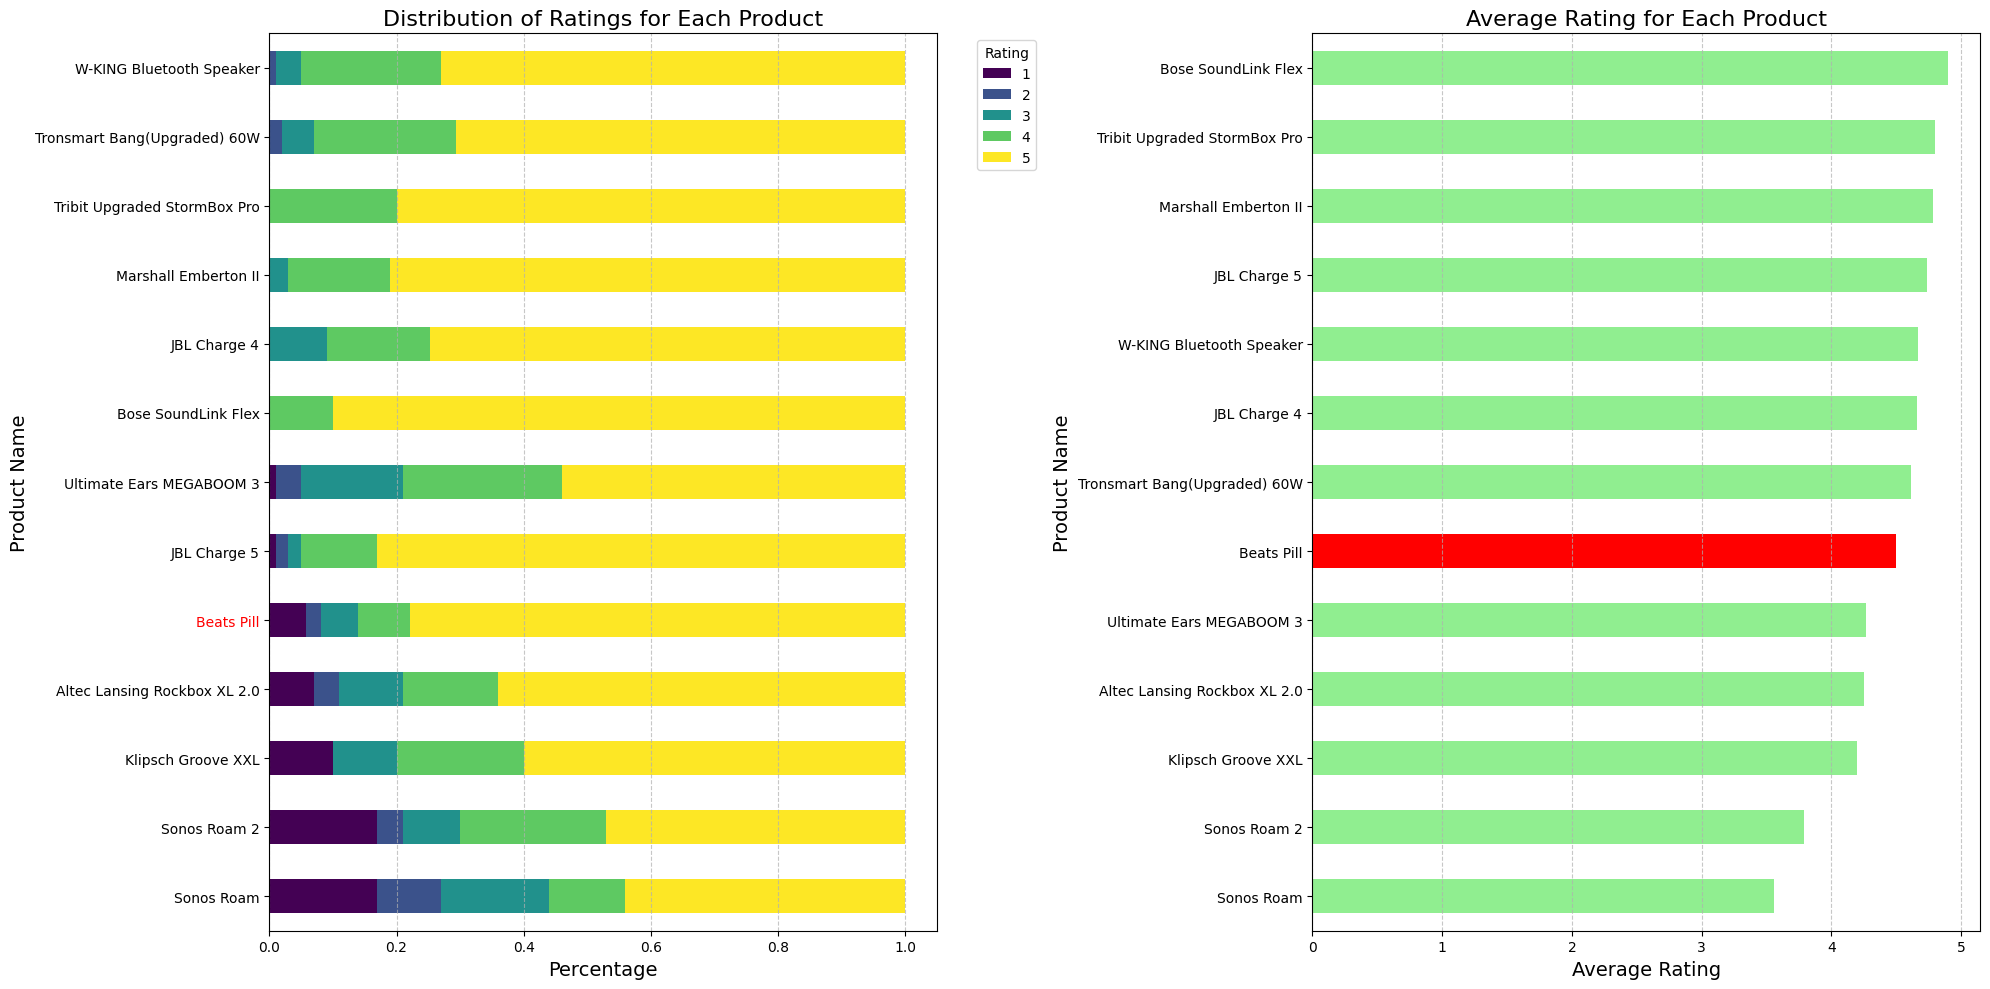

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Selecting Beats speaker as the product of interest
product_id_of_interest = 'B0D4SX9RC6'

# Filter the data
product_data = df[df['product_id'] == product_id_of_interest]
other_products_data = df[df['product_id'] != product_id_of_interest]


# Set up the subplots: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Chart 1: Distribution of Ratings
# Group ratings by product_name and get the count of each rating (1-5)
product_ratings = df.groupby('product_name')['rating'].value_counts(normalize=True).unstack()

# Sort products by the proportion of 1-star ratings in descending order
product_ratings = product_ratings.sort_values(by=1, ascending=False)

# Plot the distribution of ratings for each product
product_ratings.plot(kind='barh', stacked=True, colormap='viridis', ax=axs[0])

# Customize the y-tick labels to highlight 'Beats Pill' in red
labels = axs[0].get_yticklabels()
for label in labels:
    if 'Beats Pill' in label.get_text():
        label.set_color('red')

axs[0].set_title('Distribution of Ratings for Each Product', fontsize=16)
axs[0].set_ylabel('Product Name', fontsize=14)
axs[0].set_xlabel('Percentage', fontsize=14)
axs[0].legend(title='Rating', loc='upper left', bbox_to_anchor=(1.05, 1))

# Add gridlines
axs[0].grid(axis='x', linestyle='--', alpha=0.7)

# Chart 2: Average Ratings
# Group ratings by product_name and calculate the average rating for each product
product_ratings_avg = df.groupby('product_name')['rating'].mean()

# Sort the products by average rating in ascending order
product_ratings_avg = product_ratings_avg.sort_values(ascending=True)

# Create a horizontal bar plot for the average ratings
colors = ['lightgreen' if 'Beats' not in product else 'red' for product in product_ratings_avg.index]
product_ratings_avg.plot(kind='barh', color=colors, ax=axs[1])

# Add title and labels
axs[1].set_title('Average Rating for Each Product', fontsize=16)
axs[1].set_ylabel('Product Name', fontsize=14)
axs[1].set_xlabel('Average Rating', fontsize=14)

# Add gridlines
axs[1].grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout to fit everything
plt.tight_layout()

plt.show()




**Insights**

- Beats Pill Speaker has all ratings from 1-star to 5-star with average rating above 4.
- There are other speakers that outperform Beats Pill with only 4-star and 5-star ratings.
- Beats Pill is not among the top rated products but not the worst either.

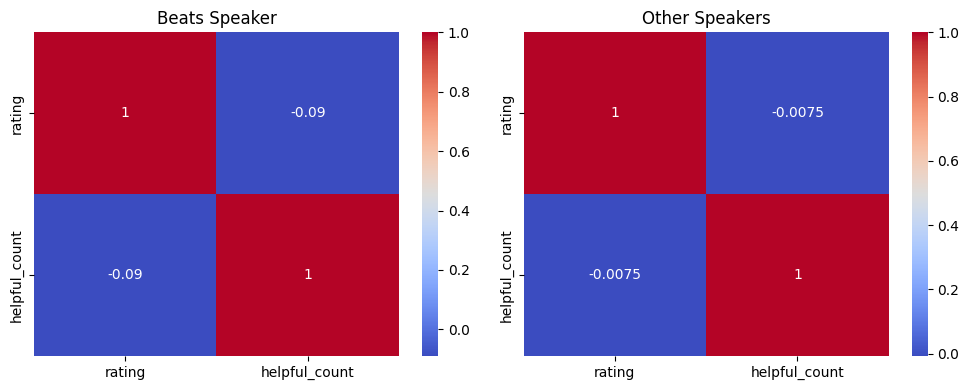

In [ ]:
# Calculate the correlation between rating and helpful_count
product_corr_matrix = product_data[['rating', 'helpful_count']].corr()
other_products_corr_matrix = other_products_data[['rating', 'helpful_count']].corr()

# Visualize the correlation using a heatmap:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(product_corr_matrix, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Beats Speaker')
sns.heatmap(other_products_corr_matrix, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Other Speakers')
plt.tight_layout()
plt.show()


**Insights**
- Beats Speaker shows a slightly negative correlation between rating and how helpful a review is perceived.
- Other Speakers show virtually no correlation between rating and helpful_count.
- This suggests that customers may find reviews helpful regardless of whether they are tied to a high or low rating,

/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)
/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)


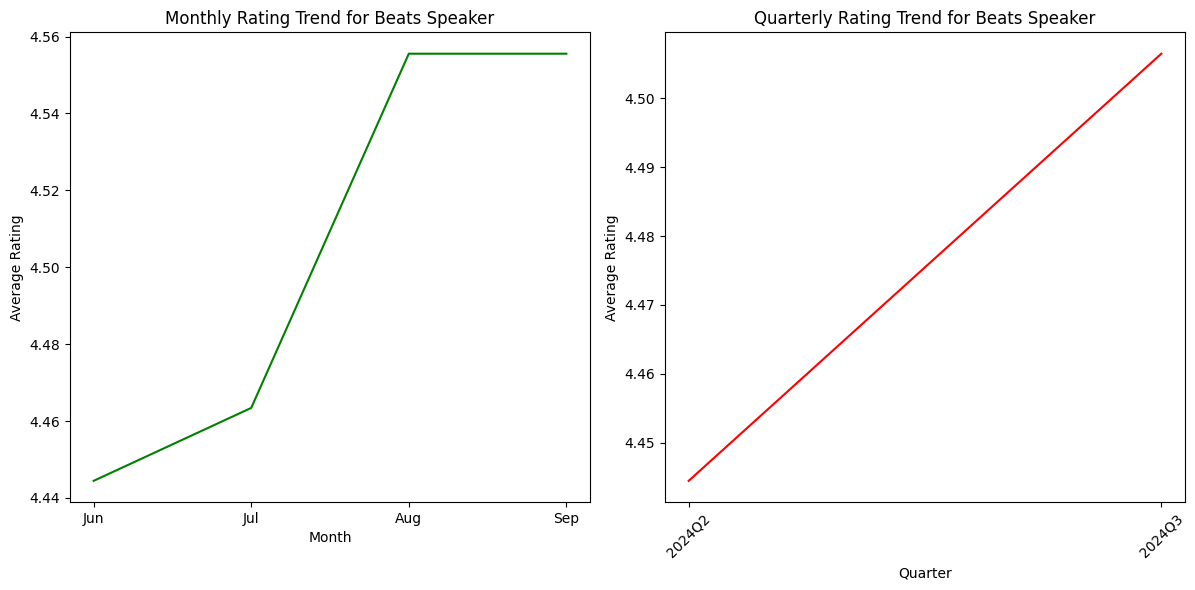

In [ ]:
# Convert 'date' column to datetime format, allowing for mixed formats
product_data.loc[:, 'date'] = pd.to_datetime(product_data['date'], format='mixed', errors='coerce')

# Analyzing Beats speaker data
Beats_monthly_ratings = product_data.groupby(pd.Grouper(key='date', freq='ME'))['rating'].mean().reset_index()
Beats_quarterly_ratings = product_data.groupby(pd.Grouper(key='date', freq='QE'))['rating'].mean().reset_index()

# Format the x-axis labels to show only the month name
Beats_monthly_ratings['date'] = Beats_monthly_ratings['date'].dt.strftime('%b')

# Quarterly: Show Q1, Q2, Q3, Q4
Beats_quarterly_ratings['date'] = Beats_quarterly_ratings['date'].dt.to_period('Q').astype(str)

# Visualize monthly rating trends
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.lineplot(x='date', y='rating', data=Beats_monthly_ratings, color='green')
plt.title('Monthly Rating Trend for Beats Speaker')
plt.xlabel('Month')
plt.ylabel('Average Rating')


# Visualize quarterly rating trends
plt.subplot(1,3,2)
sns.lineplot(x='date', y='rating', data=Beats_quarterly_ratings, color='red')
plt.title('Quarterly Rating Trend for Beats Speaker')
plt.xlabel('Quarter')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for the quarterly trend

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**Insights**
- Both monthly and quarterly rating trends show that Beats Speaker ratings increased over time.
- The average rating improved in July 2024 from 4.44 to 4.46 and continued to increase to an average of about 4.56 in August 2024.
- It maintained this high average rating of 4.56 for a month (from August 2024 to September 2024) indicating consumer satisfaction.

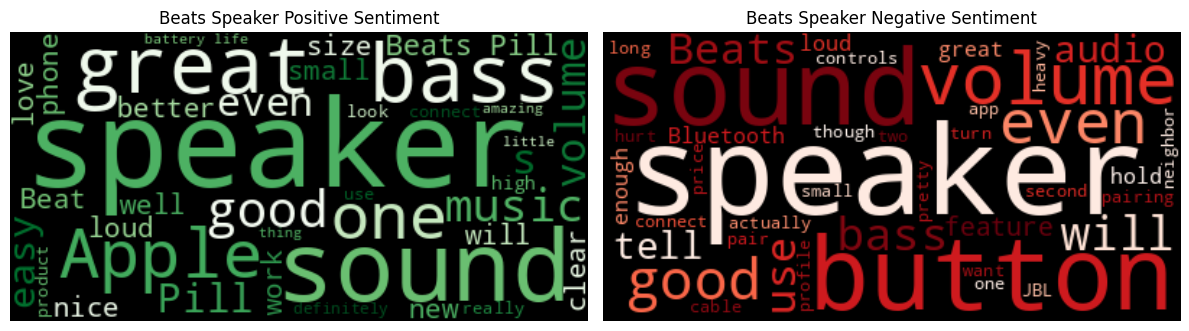

In [ ]:
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import ngrams
import matplotlib.pyplot as plt

# Download necessary NLTK data (only need to run once)
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('vader_lexicon')

# Apply Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment
def classify_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Add a 'sentiment' column to the DataFrame
product_data.loc[:, 'sentiment'] = product_data['content'].apply(classify_sentiment)

# Separate positive and negative reviews based on sentiment
product_positive_reviews = product_data[product_data['sentiment'] == 'Positive']['content'].tolist()
product_negative_reviews = product_data[product_data['sentiment'] == 'Negative']['content'].tolist()


# Preprocess reviews (remove special characters, stopwords, and tokenize)

def preprocess_remove_stopwords(reviews):
    stop_words = set(stopwords.words('english'))
    processed_reviews = []

    for review in reviews:
        tokens = review.split()  # Split the review into words (tokenization)
        tokens = [word for word in tokens if word.lower() not in stop_words]  # Remove stopwords
        processed_reviews.append(' '.join(tokens))  # Re-join the words back into a sentence

    return processed_reviews


# Generate bigrams or trigrams for positive and negative reviews
def generate_ngrams(reviews, n=2):
    all_reviews = ' '.join(reviews)
    n_grams = ngrams(all_reviews.split(), n)
    return [' '.join(n_gram) for n_gram in n_grams]

# Generate trigrams
product_positive_bigrams = generate_ngrams(product_positive_reviews, n=3)  # Change n=2 for bigrams, n=3 for trigrams
product_negative_bigrams = generate_ngrams(product_negative_reviews, n=3)  # Change n=2 for bigrams, n=3 for trigrams

# Generate word clouds for positive and negative reviews
product_positive_wordcloud = WordCloud(
    background_color='black',
    colormap='Greens',
    min_font_size=10,
    max_words=200,
    stopwords=None
).generate(' '.join(product_positive_bigrams))

product_negative_wordcloud = WordCloud(
    background_color='black',
    colormap='Reds',
    min_font_size=10,
    max_words=200,
    stopwords=None
).generate(' '.join(product_negative_bigrams))

# Display the word clouds side by side
plt.figure(figsize=(12, 8))

# Positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(product_positive_wordcloud, interpolation='bilinear')
plt.title('Beats Speaker Positive Sentiment')
plt.axis('off')

# Negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(product_negative_wordcloud, interpolation='bilinear')
plt.title('Beats Speaker Negative Sentiment')
plt.axis('off')

plt.tight_layout()
plt.show()


**Insights**

**Beats has positive reviews on:**
- Sound and speaker quality
- Bass sound
- Size
- High connection


**And has negative reviews on:**
- Speaker also
- Button sound
- Volume
- Cable connection
- Controls

### **5.3 Descriptive Statistics**


In [ ]:
import pandas as pd
from IPython.display import display, HTML

# Function to calculate statistics for the "rating" column and format headings as bold
def calculate_statistics(data1, data2):
    # Calculate statistics for "rating" column
    stats_beats = {
        'Mean': data1['rating'].mean(),
        'Median': data1['rating'].median(),
        'Mode': data1['rating'].mode().iloc[0],
        'Variance': data1['rating'].var(),
        'Standard Deviation': data1['rating'].std(),
        '25% Quantile': data1['rating'].quantile(0.25),
        '50% Quantile (Median)': data1['rating'].quantile(0.5),
        '75% Quantile': data1['rating'].quantile(0.75)
    }

    stats_others = {
        'Mean': data2['rating'].mean(),
        'Median': data2['rating'].median(),
        'Mode': data2['rating'].mode().iloc[0],
        'Variance': data2['rating'].var(),
        'Standard Deviation': data2['rating'].std(),
        '25% Quantile': data2['rating'].quantile(0.25),
        '50% Quantile (Median)': data2['rating'].quantile(0.5),
        '75% Quantile': data2['rating'].quantile(0.75)
    }

    # Combine statistics for side-by-side comparison
    stats_comparison = pd.DataFrame({
        'Beats Pill Rating': stats_beats,
        'Other Speakers Rating': stats_others
    })

    # Create HTML table and add bold subheadings
    stats_html = stats_comparison.to_html()
    stats_html = stats_html.replace('Beats Pill Rating', '<b>Beats Pill Rating</b>')
    stats_html = stats_html.replace('Other Speakers Rating', '<b>Other Speakers Rating</b>')

    # Display the statistics
    display(HTML(stats_html))

# Call the function to display the statistics comparison
calculate_statistics(product_data, other_products_data)


,Beats Pill Rating,Other Speakers Rating
Mean,4.500000,4.378233
Median,5.000000,5.000000
Mode,5.000000,5.000000
Variance,1.217647,1.143733
Standard Deviation,1.103470,1.069454
25% Quantile,5.000000,4.000000
50% Quantile (Median),5.000000,5.000000
75% Quantile,5.000000,5.000000


**Insights**
- The average rating(mean) for the Beats Pill Speaker is slightly higher than that for Other Speakers.
- The median rating shows that at least 50% of the ratings for both Beats and Other speakers are at the maximum value of 5.
- The most frequently occurring rating for both is 5.
- They both show similar levels of variance and standard deviation, indicating that the ratings are spread out similarly around the mean.
- The 25% quantile for the Beats Pill indicates that even the lower ratings for this speaker are still very positive.
- In contrast, the 25% quantile for Other Speakers is at 4.00, suggesting that a portion of ratings falls below 5.00.
- The median rating of 5.00 for both means that many users rate them highly.
- The 75% quantile indicates that 75% of ratings for the Beats Pill are 5.00, whereas for Other Speakers, 25% of ratings are also at the maximum, suggesting that while many users are satisfied with the Other Speakers, some ratings fall below the highest satisfaction level.
-  **In summary: The Beats Pill Speaker is perceived very positively, potentially outperforming other speakers in user satisfaction. However, both products have a solid customer base with high ratings, suggesting that both have their strengths in the market.**

## **6. Sentiment Analysis**

### **6.1 Methodology**


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon for sentiment analysis (only need to run once)
#nltk.download('vader_lexicon')

# Ensure the 'content' column in the DataFrame is of string type
df['content'] = df['content'].astype(str)

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to analyze sentiment
def analyze_sentiment(text):
    # Calculate sentiment scores for the given text using VADER
    sentiment = sia.polarity_scores(text)
    # Return the compound sentiment score, which summarizes the overall sentiment
    return sentiment['compound']

# Apply the analyze_sentiment function to each entry in the 'content' column
# Store the resulting compound sentiment scores in a new column 'sentiment_score'
df['sentiment_score'] = df['content'].apply(analyze_sentiment)

# Print the first five rows of the DataFrame, displaying 'content' and 'sentiment_score'
print(df[['content', 'sentiment_score']].head())

# Save the DataFrame with sentiment scores to a CSV file
df.to_csv('beats_with_sentiment.csv', index=False)


                                             content  sentiment_score
0  Needed a new portable speaker for the home set...           0.9948
1  We bought this for a trip to the beach and it ...           0.9154
2  I really like the new Beats Pill 2024 speaker....           0.9898
3  I bought this because it was on sale, and I al...           0.9847
4  So I’m super picky about sound and have spent ...           0.9851


**Insights**

VADER (Valence Aware Dictionary and sEntiment Reasoner), a sentiment analysis technique available in the NLTK (Natural Language Toolkit) library was used to conduct this analysis. VADER is effective for analyzing sentiments in text.  It calculates a compound score that ranges from -1 (very negative) to +1 (very positive), providing a straightforward metric for understanding overall sentiment.

### **6.2 Results**
Present the sentiment analysis results, including visualizations of sentiment distribution, and discuss the overall sentiment towards Beats by Dre products.


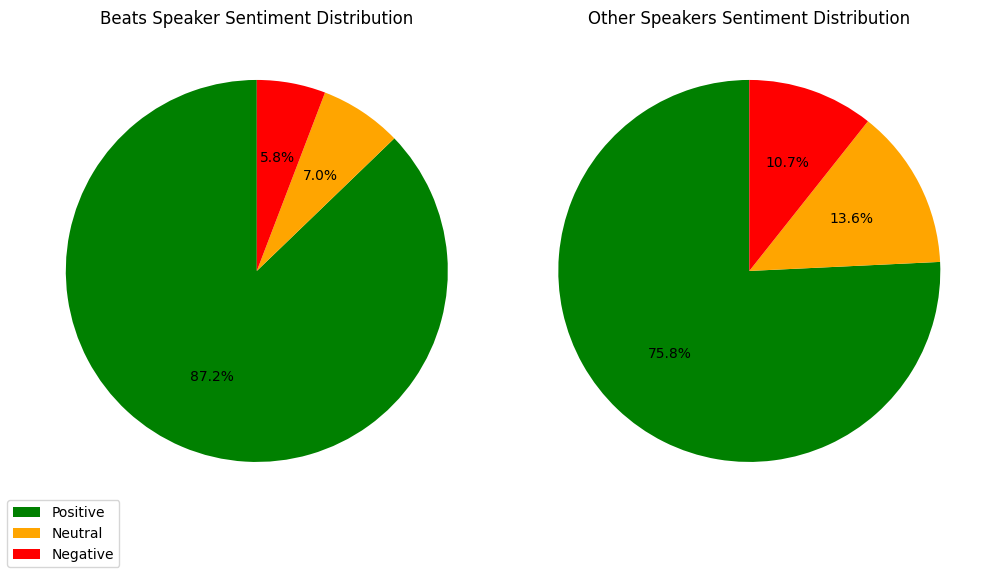

In [ ]:
# Defining sentiment classification function
sia = SentimentIntensityAnalyzer()

def classify_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Create a copy of dataframe
product_data = product_data.copy()
other_products_data = other_products_data.copy()

# Apply sentiment classification to product reviews
product_data['sentiment'] = product_data['content'].apply(classify_sentiment)
other_products_data['sentiment'] = other_products_data['content'].apply(classify_sentiment)

# Calculate overall sentiment distribution
product_sentiment_dist = product_data['sentiment'].value_counts(normalize=True)
other_products_sentiment_dist = other_products_data['sentiment'].value_counts(normalize=True)

# Set up subplots: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Labels for the legend
labels = ['Positive', 'Neutral', 'Negative']
colors = ['green', 'orange', 'red']

# Pie chart for Beats Speakers
axs[0].pie(product_sentiment_dist, autopct='%1.1f%%', colors=['green', 'orange', 'red'], startangle=90)
axs[0].set_title('Beats Speaker Sentiment Distribution')
axs[0].set_ylabel('')  # Removes the 'sentiment' label

# Pie chart for Other Speakers
axs[1].pie(other_products_sentiment_dist, autopct='%1.1f%%', colors=['green', 'orange', 'red'], startangle=90)
axs[1].set_title('Other Speakers Sentiment Distribution')
axs[1].set_ylabel('')  # Removes the 'sentiment' label

# Add legend
fig.legend(labels, loc="lower left", ncol=1)

# Adjust layout to make sure everything fits without overlap
plt.tight_layout()
plt.show()


**Insights**
- Beats speaker has a significantly higher proportion of positive sentiment (87.2%) compared to other speakers (75.75%).
- Beats generate more positive experiences and fewer complaints compared to other speaker brands, indicating customer satisfaction and favored option among users.

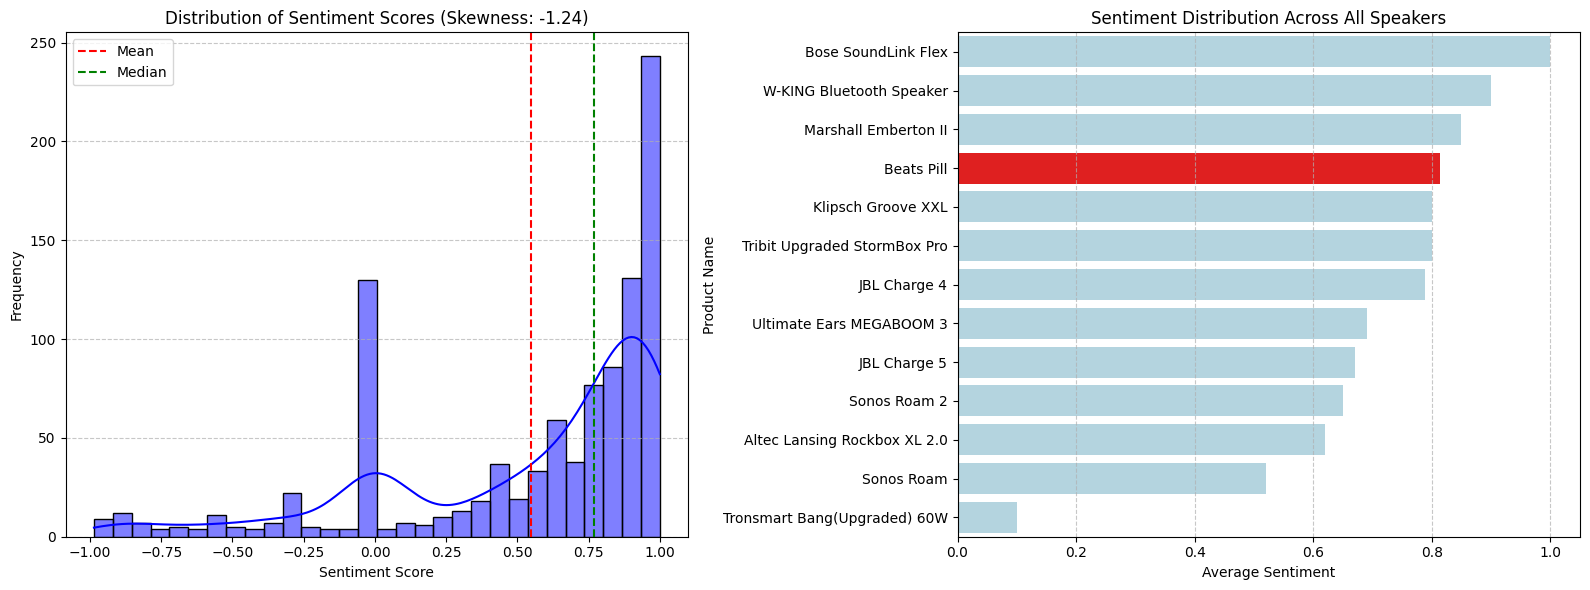

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from scipy.stats import skew

# nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment score
def calculate_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Apply sentiment analysis to the content column
df['sentiment_score'] = df['content'].apply(calculate_sentiment_score)

# Calculate skewness of sentiment scores
sentiment_skewness = skew(df['sentiment_score'])

# Set up the figure and axes for side-by-side charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Create a histogram to visualize the distribution and skewness
sns.histplot(df['sentiment_score'], bins=30, kde=True, color='blue', ax=axes[0])

# Add lines for mean and median
axes[0].axvline(df['sentiment_score'].mean(), color='red', linestyle='--', label='Mean')
axes[0].axvline(df['sentiment_score'].median(), color='green', linestyle='--', label='Median')

# Add gridlines to histogram
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Title and labels for histogram
axes[0].set_title(f'Distribution of Sentiment Scores (Skewness: {sentiment_skewness:.2f})')
axes[0].set_xlabel('Sentiment Score')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Map sentiment values to numeric values
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}

product_data['sentiment'] = product_data['sentiment'].map(sentiment_map)
other_products_data['sentiment'] = other_products_data['sentiment'].map(sentiment_map)

# Calculate sentiment distribution for each product
sentiment_distribution = pd.DataFrame({
    'Product': pd.concat([product_data['product_name'], other_products_data['product_name']]),
    'Sentiment': pd.concat([product_data['sentiment'], other_products_data['sentiment']])
})

# Group by product and calculate mean sentiment
product_sentiment = sentiment_distribution.groupby('Product')['Sentiment'].mean().reset_index()

# Sort products by mean sentiment
product_sentiment = product_sentiment.sort_values(by='Sentiment', ascending=False)

# Create the bar plot on the second axis using `hue`
sns.barplot(
    x='Sentiment',
    y='Product',
    data=product_sentiment,
    hue='Product',  # Use hue to assign colors
    dodge=False,    # Ensure bars are not split
    palette={'Beats Pill': 'red', **{p: 'lightblue' for p in product_sentiment['Product'] if p != 'Beats Pill'}},
    ax=axes[1],
    legend=False   # Suppress the legend
)

# Add gridlines to the bar plot
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

# Title and labels for the bar chart
axes[1].set_title('Sentiment Distribution Across All Speakers')
axes[1].set_xlabel('Average Sentiment')
axes[1].set_ylabel('Product Name')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


**Insights**
- The analysis reveals a negative skewness of -1.24 in the sentiment scores of the reviews. Indicating that the distribution of sentiment scores is skewed to the left.
- The negative skew suggests that while there are a substantial number of positive or neutral reviews, a significant number of reviews exhibit low sentiment scores, pointing to the presence of a few particularly negative reviews that are pulling the average sentiment score downward.
- The findings suggest that there are areas where customer satisfaction may be lacking.
- Bose Soundlink Flex speaker has the most positive sentiment while Beats Speaker takes the 4th position. This means that there are other speakers with customer satisfaction and performing well in the market, and highly competing with Beats Pill speaker.

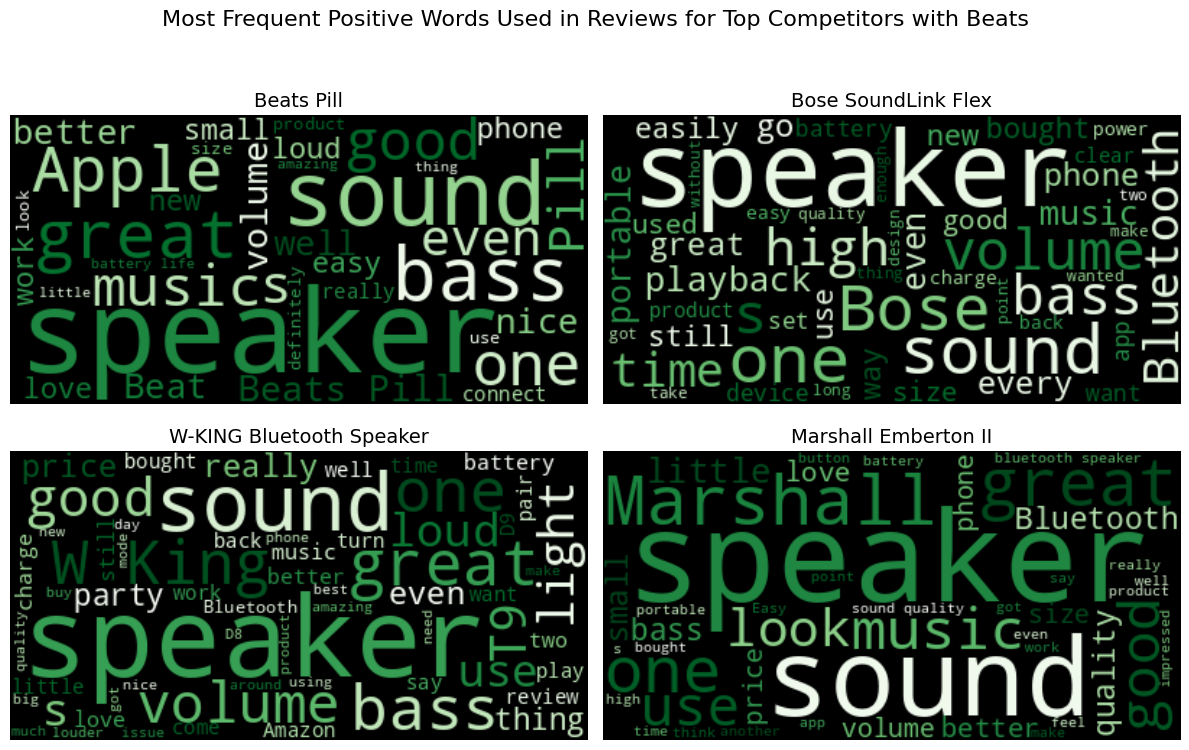

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import nltk

# Download necessary NLTK data (only need to run once)
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('vader_lexicon')

# Apply Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment
def classify_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Add a 'sentiment' column to the DataFrame
df.loc[:, 'sentiment'] = df['content'].apply(classify_sentiment)

# Function to preprocess reviews (remove stopwords)
def preprocess_reviews(reviews):
    stop_words = set(stopwords.words('english'))
    processed_reviews = []

    for review in reviews:
        tokens = review.split()  # Tokenize the text
        tokens = [word for word in tokens if word.lower() not in stop_words]  # Remove stopwords
        processed_reviews.append(' '.join(tokens))  # Re-join the words

    return processed_reviews

# Function to generate n-grams (bigrams or trigrams)
def generate_ngrams(reviews, n=3):
    all_reviews = ' '.join(reviews)
    n_grams = ngrams(all_reviews.split(), n)
    return [' '.join(n_gram) for n_gram in n_grams]

# Generate word clouds for positive reviews of specific products
def generate_wordcloud_for_product(product_name, ngram=3):
    # Filter positive reviews for the specific product
    positive_reviews = df[(df['product_name'].str.contains(product_name, case=False)) &
                          (df['sentiment'] == 'Positive')]['content'].tolist()

    if not positive_reviews:
        print(f"No positive reviews found for {product_name}.")
        return None

    # Preprocess reviews and generate n-grams
    processed_reviews = preprocess_reviews(positive_reviews)
    ngram_list = generate_ngrams(processed_reviews, n=ngram)

    if not ngram_list:
        print(f"No valid n-grams generated for {product_name}.")
        return None

    # Generate word cloud
    wordcloud = WordCloud(
        background_color='black',
        colormap='Greens',
        min_font_size=10,
        max_words=200,
        stopwords=None
    ).generate(' '.join(ngram_list))

    return wordcloud

# List of selected products
selected_products = ['Beats Pill', 'Bose SoundLink Flex', 'W-KING Bluetooth Speaker', 'Marshall Emberton II']

# Create a single large figure for all word clouds
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Most Frequent Positive Words Used in Reviews for Top Competitors with Beats', fontsize=16)

# Plot each word cloud in a 2x2 layout on the same figure
for i, product in enumerate(selected_products):
    wordcloud = generate_wordcloud_for_product(product, ngram=3)

    ax = fig.add_subplot(2, 2, i + 1)  # Create 2x2 grid
    if wordcloud:
        ax.imshow(wordcloud, interpolation='bilinear')
    else:
        ax.text(0.5, 0.5, f'No Data for {product}', fontsize=14, ha='center', va='center')

    ax.set_title(product, fontsize=14)
    ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


**Insights:**
All the speakers have positive reviews on the sound, speaker, volume and bass quality.

## **7. AI-Generated Insights**

### **7.1 Using Gemini AI**


In [ ]:
# Import necessary libraries
import os
import pandas as pd
import google.generativeai as genai # Google Gemini AI library for generative models

# Load dataset
df = pd.read_csv('new_beats_consumer_reviews.csv')

# Defining  API key for authentication with Google Gemini AI
api_key = "api_key"

# Function to analyze reviews using the Gemini AI model
def analyze_reviews(reviews, api_key,prompt_message):
    genai.configure(api_key=api_key)  # Configure the Gemini AI library with the provided API key

 # Initialize the generative model with the desired parameters
    model = genai.GenerativeModel(
        model_name="gemini-1.5-flash",
        generation_config={
            "temperature": 1,
            "top_p": 0.95,
            "top_k": 64,
            "max_output_tokens": 8192,
            "response_mime_type": "text/plain",
        },
    )
# Start a new chat session with an empty message history
    chat_session = model.start_chat(history=[])
    prompt = prompt_message + "\n\n".join(reviews)
    response = chat_session.send_message(prompt)
    return response.text

reviews_column_name = 'content'

# Extract all reviews from the specified column into a list
reviews = df[reviews_column_name].tolist()

# Define the prompt message for the analysis
prompt_message = "Analyze the reviews of the product with product_name Beats Pill and summarize the key insights:"

# Call the function to analyze reviews and store the generated insights
insights = analyze_reviews(reviews, api_key, prompt_message)


# Print the generated insights
print(insights)

**Insights**
 - Gemini AI was used to extract insights from the dataset by leveraging its advanced capabilities for natural language understanding, data analysis, and pattern recognition.
 - With Gemini AI's conversational abilities, interaction was made with the dataset by asking questions in plain language.
 - Gemini interprets these questions and generates responses

### **7.2 Key Insights**
Key insights generated by Gemini AI, including specific examples of prompts used and the responses received.


In [ ]:
# Import libraries
import os
import pandas as pd
import google.generativeai as genai

# Load your dataset
df = pd.read_csv('new_beats_consumer_reviews.csv')

api_key = "api_key"

# Analyze reviews
def analyze_reviews(reviews, api_key,prompt_message):
    genai.configure(api_key=api_key)

    model = genai.GenerativeModel(
        model_name="gemini-1.5-flash",
        generation_config={
            "temperature": 1,
            "top_p": 0.95,
            "top_k": 64,
            "max_output_tokens": 8192,
            "response_mime_type": "text/plain",
        },
    )

    chat_session = model.start_chat(history=[])
    prompt = prompt_message + "\n\n".join(reviews)
    response = chat_session.send_message(prompt)
    return response.text

reviews_column_name = 'content'
reviews = df[reviews_column_name].tolist()

# Send first prompt
prompt_message = "You are a professional consumer insights analyst, Analyze the reviews of the product with product_name Beats Pill, identify product strength and unique selling point and summarize the key insights:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)


## Beats Pill Consumer Insights Analysis

**Product Strengths:**

* **Powerful Sound:** Consistently praised for its impressive sound quality, especially considering its compact size. Reviews highlight clear highs, punchy bass, and a balanced sound profile.
* **Portability:**  Highly portable, easily fitting into bags and backpacks. The angled design and detachable lanyard enhance its portability. 
* **Long Battery Life:**  Advertised at a whopping 24 hours, and many users confirm it lives up to this claim, even with heavy use.
* **IP67 Water and Dust Resistance:**  Provides peace of mind for outdoor use, at the beach, or even in the shower. 
* **Speakerphone Functionality:**  A unique selling point that allows users to take clear calls hands-free. 
* **Apple Ecosystem Integration:**  Seamlessly connects to iPhones and Macs with a satisfying animation and supports lossless audio via USB-C.

**Unique Selling Points:**

* **Speakerphone functionality:** Beats Pill stands out as a portabl

**Beats Pill Consumer Insights Analysis**

**Product Strengths:**

- Powerful Sound
- Portability
- Long Battery Life
- IP67 Water and Dust Resistance
- Speakerphone Functionality
- Apple Ecosystem Integration

**Unique Selling Points:**

- Speakerphone functionality
- Lossless audio via USB-C
- Apple ecosystem integration

**Key Insights:**

* **Overall positive sentiment:**  The vast majority of reviews are positive, praising the Beats Pill for its sound, portability, battery life, and additional features.
* **Bass is a key driver:**  Reviewers consistently highlight the impressive bass response, which is a hallmark of the Beats brand.
* **Apple users are a key target:**  The integration with the Apple ecosystem is a significant selling point for many users, but the speaker also connects easily to Android devices.
* **Missing features:**  Some users express a desire for an accompanying app for EQ settings, battery management, and connection control.
* **Potential issues:**  A few reviewers report minor issues, such as occasional audio distortion at high volumes, a loud startup and power down sound, and the lack of an app for more control.




In [ ]:
# Send second prompt
prompt_message = "Analyze only the negative reviews of the product with product_name Beats Pill and summarize the key insights:"
insights2 = analyze_reviews(reviews, api_key, prompt_message)
print(insights2)

## Beats Pill Negative Reviews Key Insights:

**Sound Quality:**

* **Muddy Bass:**  Many reviewers found the bass to be muddy or distorted at higher volumes. 
* **Limited Soundstage:**  The speaker's small size limits the soundstage, particularly in the midrange, resulting in a less full sound.
* **Volume Issues:** While loud, the speaker struggles to maintain sound quality at maximum volume, resulting in distortion.
* **No EQ App:** The lack of an app with an equalizer limits users' ability to customize sound to their preference.

**Battery Life:**

* **Battery Not as Long as Advertised:** Some reviewers found the battery life to be significantly shorter than the claimed 24 hours, especially at higher volumes.

**Functionality:**

* **Startup Tones:**  Reviewers complained about loud, unavoidable startup and shutdown sounds, particularly since there's no way to turn them off.
* **Confusing Controls:** Users found the controls (especially the power button) to be confusing or inconveni

**Beats Pill Negative Reviews Key Insights:**

**Sound Quality:**

- Muddy or distorted bass at higher volumes.
- The speaker's small size limits the soundstage, particularly in the midrange.
- Struggles to maintain sound quality at maximum volume.
- The lack of an app with an equalizer limits users' ability to customize sound to their preference.

**Battery Life:**

- Battery life significantly shorter than the claimed 24 hours, especially at higher volumes.

**Functionality:**

- Loud, unavoidable startup and shutdown sounds, and no way to turn them off.
- Controls (especially the power button) is confusing or inconvenient, as they require specific button combinations to turn on/off the speaker.
- The absence of a dedicated app for control, settings, and battery life is a missed opportunity for most users.

**Other Issues:**

-  A few reviewers mentioned dents on the speaker grill or problems with the charging port.
- Some customers received speakers with opened boxes or missing accessories.
- When using Siri, users reported needing to be very close to the speaker, as it can interfere with the phone's microphone.

In [ ]:
# Send third prompt
prompt_message = "Conduct a comparative analysis of customer satisfaction level for all product_name in the dataset. Focusing on Beats Pill, provide a detailed comparison on features highlighting where Beats Pill outperforms or underperforms its competitors:"
insights3 = analyze_reviews(reviews, api_key, prompt_message)
print(insights3)

## Customer Satisfaction and Comparative Analysis of Portable Speakers with Focus on Beats Pill 2024

This analysis draws from the provided customer reviews to assess customer satisfaction with various portable speakers, focusing on a detailed comparison of Beats Pill 2024 to its competitors.

**Overall Customer Satisfaction:**

* **High**: The reviews generally express high satisfaction with the speakers, particularly those from Beats, JBL, and Bose. 
* **Key factors**: The key factors driving customer satisfaction include:
    * **Sound quality**: Users appreciate clear audio, rich bass, and overall balanced sound.
    * **Portability**: Compact size and lightweight design make speakers easy to carry.
    * **Durability**: Water and dust resistance are highly valued, especially for outdoor use.
    * **Battery life**: Long battery life is crucial for extended listening sessions.
    * **Features**: Additional features like speakerphone functionality, USB-C charging, and compatibility

 **The key factors driving customer satisfaction include:**
- **Sound quality**
- **Portability**
- **Durability**
- **Battery life**
- **Features**

**Comparison of Beats Pill 2024 with Competitors**

| **Products**          | **Pros** | **Cons** |
|----------------------|-------------|----------|
| **Beats Pill**             | **Excellent sound quality**<br> **Stylish design**<br> **Apple Ecosystem Integration**<br> **Speakerphone**<br> **IP67 Rating**<br> **Long Battery Life** |  **No dedicated app**.<br> **Power button quirks**<br> **Price**
| **JBL Charge 5**             | **Powerful sound**<br> **Durable build**<br>  **USB-C charging**<br> **Speakerphone**<br> **Power bank functionality**<br> | **Less balanced sound**<br> **No app**<br> **Price**
| **Bose SoundLink Flex** | **Compact size**<br> **Balanced sound**<br> **Durable**<br> **Speakerphone**<br> **Bose Music app** | **Limited volume**<br> **Bass can be muddy**
| **Ultimate Ears Boom 3**  | **Excellent sound quality**<br> **360-degree sound**<br> **Waterproof and float**<br> **Durable** |**No speakerphone**<br>  **Limited app functionality**<br> **Price**



### **7.3 Interpretation**


**Marketing Strategies:**
- The analysis emphasizes the Beats Pill's strong market position due to its powerful sound, unique features, and integration with the Apple ecosystem.
- By leveraging these insights, Beats by Dre can refine its marketing strategy, enhance product development, and address consumer needs.

**Feature Development:**
- Several critical areas for improvement have also been identified. Beats can enhance user satisfaction and solidify its competitive advantage in the portable speaker market.
- Exploring ways to improve functionality, like introducing an emotional intelligence app, can attract audiophiles and tech-savvy users.

**Consumer Feedback:**
- Listening to consumer feedback and implementing changes based on reviews can enhance satisfaction and brand loyalty.


## **8. Comparative Analysis**

### **8.1 Competitor Overview**
List the competitors analyzed and provide a brief overview of their market positioning.

**1. Beats Pill:** Premium portable speaker targeting Apple ecosystem users seeking quality audio, speakerphone functionality, and seamless integration.


**2. JBL Charge 5:** Durable, feature-rich portable speaker with high volume output and long battery life.


**3. Bose Soundlink Flex:** Compact, stylish, and durable portable speaker with balanced sound and a focus on portability.


**4. Tribit Stormbox Pro:**  Value-for-money portable speaker with impressive sound quality and features for its price point.


**5. W-King T9-2:**  Powerful, feature-rich portable speaker with a focus on sound quality and loudness.



**6. Marshall Emberton II:** Stylish and compact portable speaker with a focus on premium design and sound quality.


**7. Ultimate Ears Megaboom 3:** Durable and waterproof portable speaker with 360-degree sound and a focus on outdoor use.


**8. Sonos Roam 2:** Premium, compact portable speaker with seamless integration into the Sonos ecosystem.


**9. Altec Lansing Rockbox XL 2.0:** Durable and waterproof portable speaker with a focus on loudness and bass.


**10. Tronsmart Bang:** Affordable and powerful portable speaker with impressive sound quality and features.

**11. JBL Charge 4:** Compact, portable, and waterproof speaker with balanced sound, impressive battery life, and a sleek design, suitable for both indoor and outdoor use.

**12.Klipsch Groove XXL:** Compact, stylish, and well-built speaker with a vintage aesthetic, delivering a clear sound with a focus on mids and highs, and decent battery life, suitable for both indoor and outdoor use.

**13. Sonos Roam:** Premium, compact portable speaker with integration into the Sonos ecosystem.




### **8.2 Comparison of Sentiments**
Compare the sentiment analysis results of Beats by Dre with its competitors using visualizations to highlight differences and similarities.

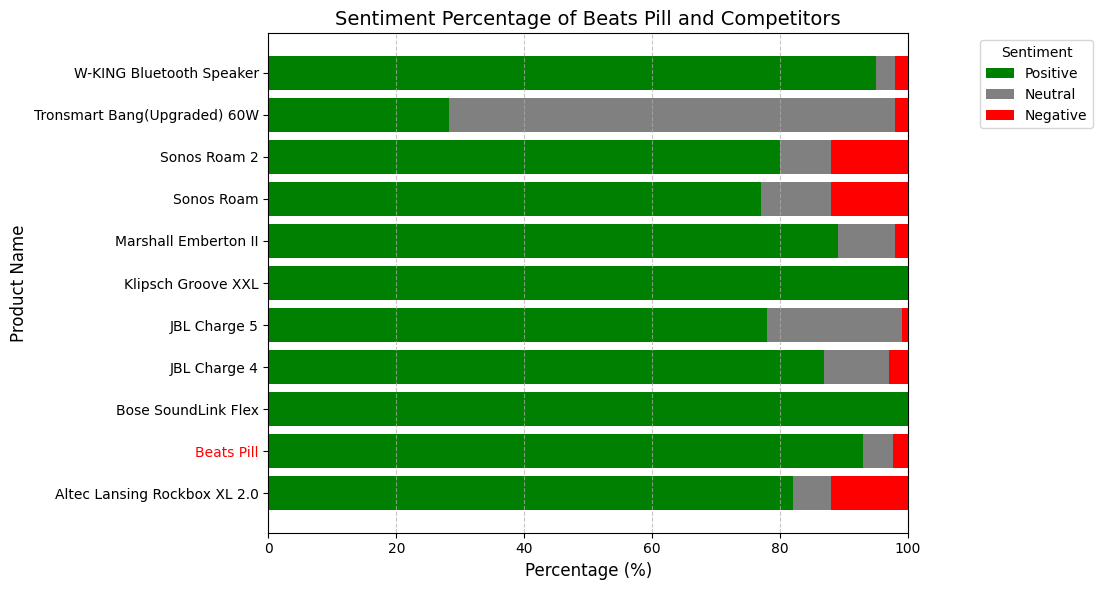

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Read the reviews from the dataset
reviews = pd.read_csv('new_beats_consumer_reviews.csv')

# Perform sentiment analysis
reviews['Polarity'] = reviews['content'].apply(lambda review: TextBlob(review).sentiment.polarity)

# Define competitor product names
competitors = [
    'JBL Charge 5', 'Bose SoundLink Flex', 'Ultimate Ears Megaboom 3',
    'Tribit Stormbox Pro', 'Marshall Emberton II', 'Sonos Roam 2',
    'JBL Charge 4', 'W-KING Bluetooth Speaker', 'Sonos Roam',
    'Altec Lansing Rockbox XL 2.0', 'Klipsch Groove XXL', 'Tronsmart Bang(Upgraded) 60W'
]

# Filter reviews to only include those for Beats and its competitors
filtered_reviews = reviews[reviews['product_name'].isin(competitors + ['Beats Pill'])]

# Group by product name and calculate the count of each sentiment type
sentiment_counts = filtered_reviews.groupby('product_name')['Polarity'].agg(
    Positive=lambda x: (x > 0).sum(),
    Neutral=lambda x: (x == 0).sum(),
    Negative=lambda x: (x < 0).sum()
).reset_index()

# Calculate total counts and percentages
sentiment_counts['Total'] = sentiment_counts[['Positive', 'Neutral', 'Negative']].sum(axis=1)
sentiment_counts['Positive Percentage'] = sentiment_counts['Positive'] / sentiment_counts['Total'] * 100
sentiment_counts['Neutral Percentage'] = sentiment_counts['Neutral'] / sentiment_counts['Total'] * 100
sentiment_counts['Negative Percentage'] = sentiment_counts['Negative'] / sentiment_counts['Total'] * 100

# Prepare data for stacked bar plot
stacked_data = sentiment_counts[['product_name', 'Positive Percentage', 'Neutral Percentage', 'Negative Percentage']]

# Set the index for the bar plot
stacked_data.set_index('product_name', inplace=True)

# Create a stacked bar plot
plt.figure(figsize=(12, 6))

# Plot each sentiment type as a separate layer in the bar
bottoms = None
colors = ['green', 'gray', 'red']
for sentiment, color in zip(['Positive Percentage', 'Neutral Percentage', 'Negative Percentage'], colors):
    plt.barh(stacked_data.index, stacked_data[sentiment], left=bottoms, label=sentiment.replace(' Percentage', ''), color=color)
    bottoms = stacked_data[sentiment] if bottoms is None else bottoms + stacked_data[sentiment]

# Customize the y-tick labels to show "Beats Pill" in red
for label in plt.gca().get_yticklabels():
    if label.get_text() == 'Beats Pill':
        label.set_color('red')  # Set "Beats Pill" to red
    else:
        label.set_color('black')  # Ensure all other labels are black

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add titles and labels
plt.title('Sentiment Percentage of Beats Pill and Competitors', fontsize=14)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

# Display the legend
plt.legend(title='Sentiment', loc='upper right',  bbox_to_anchor=(1.3, 1))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


**Insights**

- Klipsch Groove XXL and Bose SoundLink Flex outperform Beats, having only positive sentiment.

### **8.3 SWOT Analysis**
Conduct a SWOT analysis (Strengths, Weaknesses, Opportunities, Threats) for Beats by Dre based on the comparative data.

**SWOT Analysis for Beats by Dre**

**Strength**

- **Sound Quality:**  Reviewers consistently praise the Beats Pill's sound quality, particularly its powerful bass and clear vocals.
- **Portability:**  Its compact size and lightweight design make it easy to carry around, perfect for travel and outdoor use.
- **Durability:**  IP67 rating provides dust and water resistance, allowing for confident use in various environments.
- **Battery Life:**  A long battery life of up to 24 hours is a major selling point, allowing for extended listening sessions without needing to recharge.
- **Speakerphone Function:**  Reviewers appreciate the ability to use the speaker for clear hands-free calls.
- **Apple Ecosystem Integration:**  Seamless connection with Apple devices, including Find My and lossless audio playback via USB-C.

-----------------------------------------------------------------------

**Weaknesses:**

- **Sound Distortion at Higher Volumes:**  Some reviewers note that the sound quality diminishes and bass becomes muddy at higher volumes.
- **Lack of App Control:**  There is no dedicated app for the Beats Pill to control EQ settings, check battery life, or manage connections.
- **Confusing On/Off Function:**  The on/off function requires a specific button press sequence which can be inconvenient for some users.
- **Startup and Power Down Tones:**  The speaker's startup and power down tones are considered too loud and cannot be adjusted.
- **Price:**  Some reviewers find the price to be relatively high compared to competitors offering similar features.

------------------------------------------------------------------------


**Opportunities:**

- **Improve Sound Quality at Higher Volumes:**  Addressing the sound distortion at higher volumes will enhance the overall listening experience.
- **Develop a Dedicated App:**  An app with EQ settings, battery life monitoring, and connection management will enhance the user experience and address user demands.
- **Introduce New Features:**  Exploring new features like voice assistant integration or personalized sound profiles could attract more customers.
- **Competitive Pricing:**  Adjusting the price point to be more competitive with rival products will attract a wider audience.

-----------------------------------------------------------------------
**Threats:**

- **Competition:**  The portable speaker market is highly competitive, with brands like JBL, Bose, and Ultimate Ears offering comparable products at various price points.
- **Limited Functionality:**  The lack of an app and certain features might make the Beats Pill less appealing to users who prioritize these aspects.
- **Negative Reviews:**  Negative reviews focusing on sound distortion and lack of app control could negatively impact brand perception and sales.



## **9. Strategic Recommendations**

### **9.1 Product Improvements**
Based on the analysis, suggest specific product improvements.

**Key Areas for Product Improvement:**

* **Sound Quality at Higher Volumes:**  Some users report muddy bass and distorted audio at volumes above 50%. This could be addressed by:
    * **Improving speaker drivers:**  Investing in higher quality drivers that can handle higher volumes without distortion.
    * **Introducing an equalizer:** Adding an in-app equalizer to allow users to fine-tune the sound profile to their preferences.
* **Power Button Design:** The current power button requires a specific hold time to turn on/off the speaker, which some find confusing and inconvenient. This could be addressed by:
    * **Implementing a clear, tactile button:**  Using a dedicated power button with a tactile click to provide clear feedback.
    * **Simplifying the power on/off process:** Allowing the power button to turn the speaker on/off with a single press.
* **App Functionality:** The lack of an app to control the Beats Pill is a recurring complaint. This could be addressed by:
    * **Developing a dedicated app:** Creating a Beats Pill app that would allow users to adjust settings, check battery life, manage connections, and even use an EQ.
* **Startup and Power Down Tones:** Users complain about the loud startup and power down tones, especially the lack of an option to disable them. This could be addressed by:
    * **Introducing volume control for tones:** Allowing users to adjust the volume of the tones or disable them altogether.
* **Durability Concerns:** Some users report dents in the speaker grill after minor drops. This could be addressed by:
    * **Strengthening the speaker grill:** Using a more durable material for the grill to withstand accidental drops.

### **9.2 Marketing Strategies**
Provide recommendations for marketing strategies that could enhance consumer perception and satisfaction.

**Marketing Strategies for Beats:**

* **Emphasize Sound Quality and Bass:** Focus on the Beats Pill's exceptional sound quality, especially the punchy bass, using high-quality audio demonstrations in marketing materials.
* **Highlight Portability:**  Showcase its compact size and lightweight design, using imagery and video of people using it on the go, traveling, and enjoying outdoor activities.
* **Promote Apple Ecosystem Integration:** Target Apple users with messaging that emphasizes the seamless connection with iPhones and Apple Music, along with Find My integration.
* **Feature Speakerphone Functionality:**  Demonstrate its clarity and convenience for taking calls and holding group conversations, particularly for work and family use.
* **Address Price Concerns:**  Emphasize the value proposition by highlighting its high-quality sound, long battery life, and durable design compared to competitors at similar price points.
* **Consider an App:** Developing a dedicated app could address user complaints and add value. It could include features like:

    * **Battery Monitoring**
    * **Connection Management**
    * **Software Updates**  
* **Address Sound Distortion:**  Acknowledge potential sound distortion at high volumes and address it in marketing materials by:
    * **Clearly stating volume limitations**
    * **Highlighting its suitability for smaller gatherings**  
* **Offer Sound Customization:**  Allow users to customize startup and shutdown tones or offer different options to cater to individual preferences.



### **9.3 Future Research**
Suggest areas for future research or additional data that could be collected to further enhance the analysis.

**Future Research Areas:**

* **App Development:** Conducting research into the potential user needs and features for a dedicated Beats Pill app could lead to a highly engaging and useful user experience.
* **Sound Quality Optimization:** Investigating ways to improve sound quality at higher volumes and address the perceived muddiness in bass could be a major selling point.
* **User Interface Design:** Analyzing user feedback regarding the current button design and functionality could help in creating a more intuitive and user-friendly control system.
* **Comparison with Competitors:**  Conducting a comprehensive comparison with other similarly priced portable speakers from brands like JBL, Bose, and Ultimate Ears would provide valuable insights into the Beats Pill's competitive advantages and disadvantages.
* **Long-Term Durability:**  Collecting data on the long-term durability of the speaker, particularly in challenging environments, would be valuable for potential buyers.

**Additional Data Collection:**

* **Detailed Sound Profiles:**  Collecting audio data from the speaker at different volume levels and using various music genres could provide a more objective analysis of sound quality.
* **User-Generated Content:**  Gathering user-created content such as videos, photos, and audio recordings showcasing the speaker's use in different situations could enrich the understanding of the product.
* **App Usage Data:**  Collecting anonymized app usage data could provide insights into user behavior and help identify areas for improvement.
* **Customer Satisfaction Surveys:**  Conducting surveys to gauge customer satisfaction with the speaker's performance, features, and overall value for money could provide valuable feedback for future product development.



## **10. Conclusion**
Summarize the key findings and their implications, and reflect on the overall project and its contribution to understanding consumer sentiment for Beats by Dre.

**The analysis of the reviews reveals a mixed sentiment towards the Beats Pill, with both positive and negative aspects highlighted.**

**Key Findings:**

**Positive Aspects:**

* Sound Quality.  
* Portability & Design.
* Battery Life.
* Durability.
* Speakerphone Function.
* Apple Ecosystem Integration.

**Negative Aspects:**

* Sound Quality at High Volume.
* Lack of App Control.
* Startup & Power Down Tones.
* Price.
* Build Quality Issues.

**Implications:**

* **Target Audience:** The Beats Pill's strengths suggest it's well-suited for consumers who prioritize sound quality, portability, and design. It also appeals to those who value Apple ecosystem integration and seek a versatile speaker for both music and calls.
* **Product Improvements:** The lack of app control and the high startup/power down sounds are areas where Beats could improve the user experience. Addressing these issues could further increase user satisfaction.
* **Pricing Considerations:**  Beats needs to be mindful of the perceived value proposition, especially considering the price point and the availability of other speakers with similar features at lower costs.
* **Quality Control:**  Ensuring proper packaging and handling is crucial to maintain a positive customer experience and brand reputation.

**Overall Project Reflection:**

* This project has provided valuable insights into consumer sentiment towards the Beats Pill. By analyzing a variety of reviews, key strengths and weaknesses of the product were identified, revealing areas where Beats could make improvements.

* The findings emphasize the importance of understanding consumer needs and preferences when developing and marketing products. Ultimately, the project contributes to a deeper understanding of the market for portable Bluetooth speakers, providing useful information for both consumers and manufacturers.


## **11. References**
List all the sources, tools, and references used in the project.


**References:**

- Libraries and Tools
 * **Amazon website (www.amazon.com)**
 * **Pandas**
 * **Numpy**
 * **Textblob**  
 * **Matplotlib**
 * **Seaborn**
 * **WordCloud**
 * **SentimentIntensityAnalyzer**
 * **NLTK (Natural Language Toolkit)**
 * **scipy.stats (Scientific Python - Stats Module)**  
 * **VADER Lexicon (Valence Aware Dictionary for Sentiment Reasoning)**
 * **Gemini AI**